EN2550 Assignment 01

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_01

In [1]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

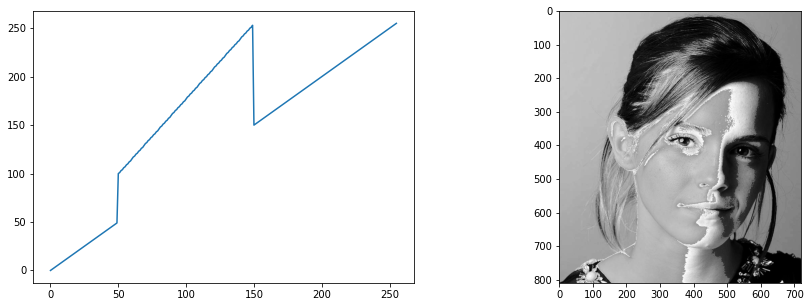

In [3]:
# 1

f=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

t=np.zeros(255-0+1).astype(np.uint8)
r1=np.linspace(0,50,(50+1-0)).astype(np.uint8)
r2=np.linspace(100,255,(150+1-50)).astype(np.uint8)
r3=np.linspace(150,255,(255+1-150)).astype(np.uint8)
t[0:50+1]=r1
t[50:150+1]=r2
t[150:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(g,cmap='gray', vmin=0, vmax=255)


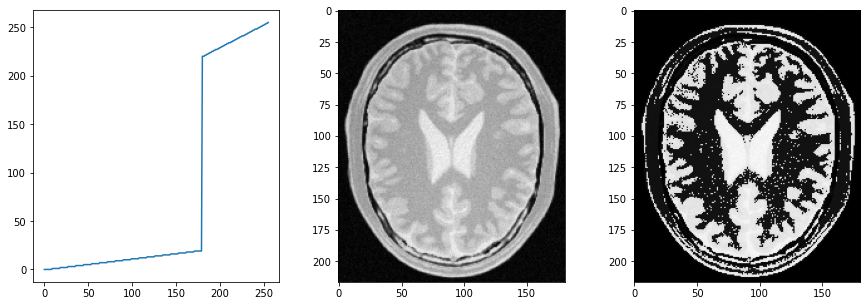

In [7]:
# 2 (a) white matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a=180
t=np.zeros(256).astype(np.uint8)

r1=np.linspace(0,20,(a+1)).astype(np.uint8)
r2=np.linspace(220,255,(255+1-a)).astype(np.uint8)
t[0:a+1]=r1
t[a:255+1]=r2

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)


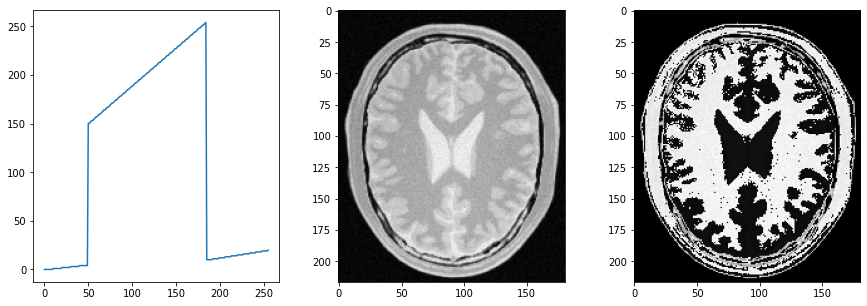

In [3]:
# 2 (b) gray matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a1,a2=50,185
t=np.zeros(256).astype(np.uint8)
r1=np.linspace(0,5,(a1+1-0)).astype(np.uint8)
r2=np.linspace(150,255,(a2+1-a1)).astype(np.uint8)
r3=np.linspace(10,20,(255+1-a2)).astype(np.uint8)
t[0:a1+1]=r1
t[a1:a2+1]=r2
t[a2:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)

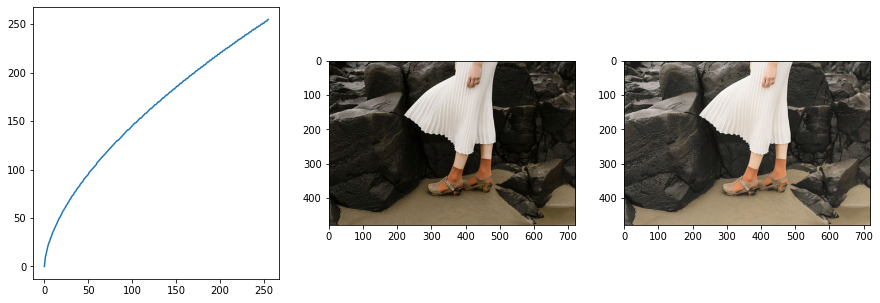

In [24]:
# 3 (a)

f=cv.imread('highlights_and_shadows.jpg')
assert f is not None

lab_org=cv.cvtColor(f,cv.COLOR_BGR2Lab)
gamma=0.6
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)

lab_t=np.copy(lab_org)
lab_t[:,:,0]=t[lab_t[:,:,0]]
rgb_org=cv.cvtColor(lab_org,cv.COLOR_Lab2RGB)
rgb_t=cv.cvtColor(lab_t,cv.COLOR_Lab2RGB)
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(t)
ax[1].imshow(rgb_org)
ax[2].imshow(rgb_t)

Text(0.5, 1.0, 'Corrected - L pane')

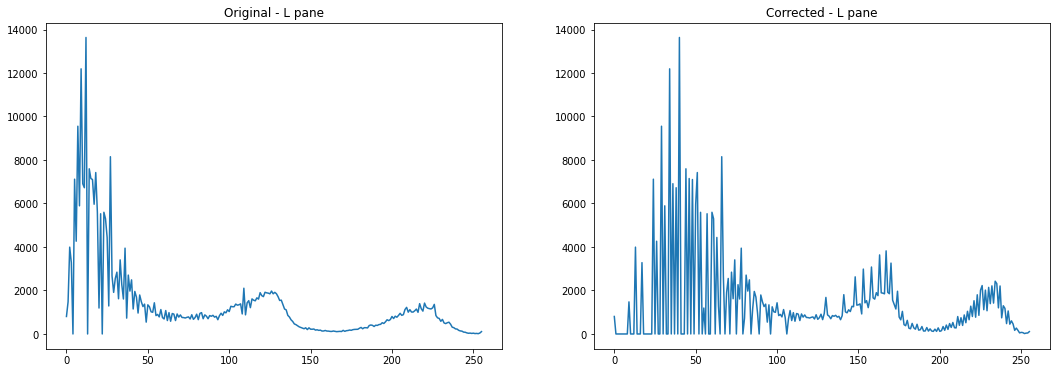

In [27]:
# 3 (b)

hist_org=cv.calcHist([lab_org],[0],None,[256],[0,256])
hist_t=cv.calcHist([lab_t],[0],None,[256],[0,256])
fig,ax=plt.subplots(1,2,figsize=(18,6))
ax[0].plot(hist_org)
ax[0].set_title("Original - L pane")
ax[1].plot(hist_t)
ax[1].set_title("Corrected - L pane")

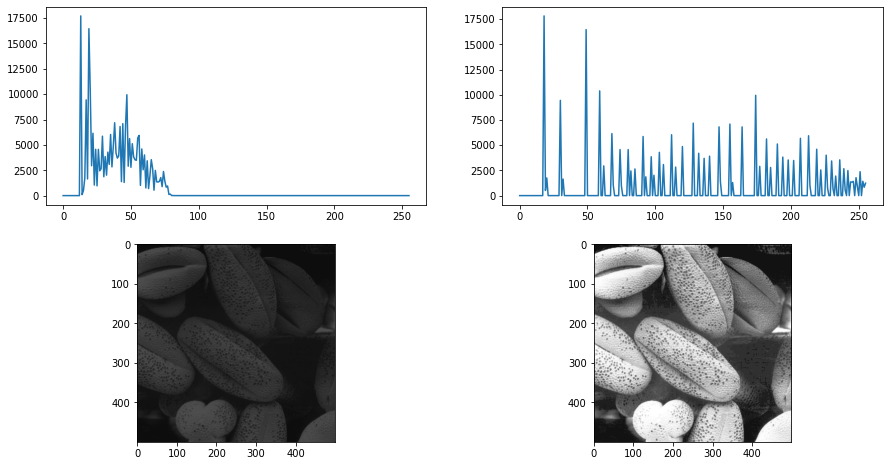

In [17]:
# 4

f=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None


hist_org=cv.calcHist([f],[0],None,[256],[0,256])
cumsum=hist_org.cumsum()
t=np.round(cumsum*255/f.size).astype(np.uint8)
g=t[f]
hist_eq=cv.calcHist([g],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,8))
ax[0][0].plot(hist_org)
ax[0][1].plot(hist_eq)
ax[1][0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[1][1].imshow(g,cmap='gray', vmin=0, vmax=255)



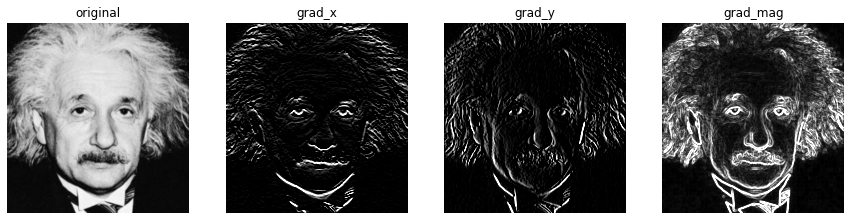

In [28]:
# 6 (a)

f=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],
dtype=np.float32)

f_x=cv.filter2D(f,-1,sobel_v)

sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],
dtype=np.float32)

f_y=cv.filter2D(f,-1,sobel_h)

grad_mag=np.sqrt(f_x**2+f_y**2)

fig,ax=plt.subplots(1,4,figsize=(15,8))

ax[0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grad_x')
ax[2].imshow(f_y,cmap='gray', vmin=0, vmax=255)
ax[2].set_title('grad_y')
ax[3].imshow(grad_mag,cmap='gray', vmin=0, vmax=255)
ax[3].set_title('grad_mag')

for axi in ax.ravel(): axi.axis('off')

In [9]:
# 6 (b)

def add_padding(img,pad_i,pad_j):    
    padded=np.zeros((img.shape[0]+pad_i*2,img.shape[1]+pad_j*2)).astype(np.float32)
    padded[pad_i:-pad_i,pad_j:-pad_j]=img
    return padded

def remove_padding(padded,pad_i,pad_j):    
    return padded[pad_i:-pad_i,pad_j:-pad_j]

def convolve(img,kernal):
    a=kernal.shape[0]
    b=kernal.shape[1]
    flatKernal=kernal[::-1,::-1].flatten()
    padded=add_padding(img,a//2,b//2)
    res=np.zeros(img.shape).astype(np.float32)
    for m in range(img.shape[0]):
        for n in range(img.shape[1]):
            res[m,n]=np.dot(padded[m:m+a,n:n+b].flatten(),flatKernal)

    return res


f=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]])

w=np.array([[1,2,3],
    [4,5,6],
    [7,8,9]])
    
# img=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[14,15,16,18],[20,21,25,28]])
# kernal=np.ones((5,5))
# print(img)
# print(kernal)
# padded=add_padding(img,kernal)
# print(padded)
# print(remove_padding(padded,kernal))

print(convolve(f,w))

# f_x=cv.filter2D(f,-1,sobel_v)


# f_y=cv.filter2D(f,-1,sobel_h)

# grad_mag=np.sqrt(f_x**2+f_y**2)

# fig,ax=plt.subplots(1,4,figsize=(15,8))

# ax[0].imshow(f,cmap='gray', vmin=0, vmax=255)
# ax[0].set_title('original')
# ax[1].imshow(f_x,cmap='gray', vmin=0, vmax=255)
# ax[1].set_title('grad_x')
# ax[2].imshow(f_y,cmap='gray', vmin=0, vmax=255)
# ax[2].set_title('grad_y')
# ax[3].imshow(grad_mag,cmap='gray', vmin=0, vmax=255)
# ax[3].set_title('grad_mag')

# for axi in ax.ravel(): axi.axis('off')

[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]
